In [83]:
# Imports
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Command line
# run these to download the 8 datafiles first

# $ python dl.py BTCUSDT 2024-11-01 2024-11-03 data bybit 5 spot
# $ python dl.py ETHUSDT 2024-11-01 2024-11-03 data bybit 5 spot
# $ python dl.py BTCUSDT 2024-11-01 2024-11-03 data bybit 5 linear
# $ python dl.py ETHUSDT 2024-11-01 2024-11-03 data bybit 5 linear

# $ python dl.py BTCUSDT 2024-11-01 2024-11-03 data binance 5m spot
# $ python dl.py ETHUSDT 2024-11-01 2024-11-03 data binance 5m spot
# $ python dl.py BTCUSDT 2024-11-01 2024-11-03 data binance 5m futures --type=um
# $ python dl.py ETHUSDT 2024-11-01 2024-11-03 data binance 5m futures --type=um

## Binance Exchange

### ETH

In [85]:
# Futures
filepath = 'binance-futures-ETHUSDT-5m.csv'
ethusd_binance_futures = pd.read_csv(filepath, index_col='time')
ethusd_binance_futures.index = pd.to_datetime(ethusd_binance_futures.index, unit='ms')
ethusd_binance_futures['LogClose'] = np.log(ethusd_binance_futures['close'])

# Spot
filepath = 'binance-spot-ETHUSDT-5m.csv'
ethusd_binance_spot = pd.read_csv(filepath, index_col='time')
ethusd_binance_spot.index = pd.to_datetime(ethusd_binance_spot.index, unit='ms')
ethusd_binance_spot['LogClose'] = np.log(ethusd_binance_spot['close'])

In [86]:
ethusd_binance_logbasis = ethusd_binance_futures['LogClose'] - ethusd_binance_spot['LogClose']
ethusd_binance_basis = ethusd_binance_futures['close'] - ethusd_binance_spot['close']

# ethusd_binance_basis.plot(title='Binance ETHUSD Basis')
# plt.show()

In [87]:
# ethusd_binance_logbasis.plot(title='Binance ETHUSD LogBasis')
# plt.show()

### BTC

In [88]:
# Futures
filepath = 'binance-futures-BTCUSDT-5m.csv'
btcusd_binance_futures = pd.read_csv(filepath, index_col='time')
btcusd_binance_futures.index = pd.to_datetime(btcusd_binance_futures.index, unit='ms')
btcusd_binance_futures['LogClose'] = np.log(btcusd_binance_futures['close'])

# Spot
filepath = 'binance-spot-BTCUSDT-5m.csv'
btcusd_binance_spot = pd.read_csv(filepath, index_col='time')
btcusd_binance_spot.index = pd.to_datetime(btcusd_binance_spot.index, unit='ms')
btcusd_binance_spot['LogClose'] = np.log(btcusd_binance_spot['close'])

In [89]:
btcusd_binance_logbasis = btcusd_binance_futures['LogClose'] - btcusd_binance_spot['LogClose']
btcusd_binance_basis = btcusd_binance_futures['close'] - btcusd_binance_spot['close']

# btcusd_binance_basis.plot(title='Binance BTCUSD Basis')
# plt.show()

In [90]:
# btcusd_binance_logbasis.plot(title='Binance BTCUSD LogBasis')
# plt.show()

## Bybit Exchange

### ETH

In [91]:
# Futures
filepath = 'bybit-linear-ETHUSDT-5.csv'
ethusd_bybit_futures = pd.read_csv(filepath, index_col='time')
ethusd_bybit_futures.index = pd.to_datetime(ethusd_bybit_futures.index, unit='ms')
ethusd_bybit_futures['LogClose'] = np.log(ethusd_bybit_futures['close'])

# Spot
filepath = 'bybit-spot-ETHUSDT-5.csv'
ethusd_bybit_spot = pd.read_csv(filepath, index_col='time')
ethusd_bybit_spot.index = pd.to_datetime(ethusd_bybit_spot.index, unit='ms')
ethusd_bybit_spot['LogClose'] = np.log(ethusd_bybit_spot['close'])

In [92]:
ethusd_bybit_logbasis = ethusd_bybit_futures['LogClose'] - ethusd_bybit_spot['LogClose']
ethusd_bybit_basis = ethusd_bybit_futures['close'] - ethusd_bybit_spot['close']

# ethusd_bybit_basis.plot(title='Bybit ETHUSD Basis')
# plt.show()

In [93]:
# ethusd_bybit_logbasis.plot(title='Bybit ETHUSD LogBasis')
# plt.show()

### BTC

In [94]:
# Futures
filepath = 'bybit-linear-BTCUSDT-5.csv'
btcusd_bybit_futures = pd.read_csv(filepath, index_col='time')
btcusd_bybit_futures.index = pd.to_datetime(btcusd_bybit_futures.index, unit='ms')
btcusd_bybit_futures['LogClose'] = np.log(btcusd_bybit_futures['close'])

# Spot
filepath = 'bybit-spot-BTCUSDT-5.csv'
btcusd_bybit_spot = pd.read_csv(filepath, index_col='time')
btcusd_bybit_spot.index = pd.to_datetime(btcusd_bybit_spot.index, unit='ms')
btcusd_bybit_spot['LogClose'] = np.log(btcusd_bybit_spot['close'])

In [95]:
btcusd_bybit_logbasis = btcusd_bybit_futures['LogClose'] - btcusd_bybit_spot['LogClose']
btcusd_bybit_basis = btcusd_bybit_futures['close'] - btcusd_bybit_spot['close']

# btcusd_bybit_basis.plot(title='Bybit BTCUSD Basis')
# plt.show()

In [96]:
# btcusd_bybit_logbasis.plot(title='Bybit BTCUSD LogBasis')
# plt.show()

## Compare between exchanges
### BTC

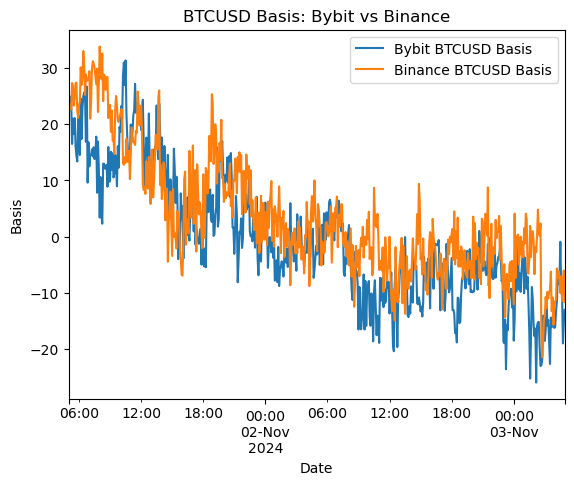

In [97]:
# BTCUSD Basis
btcusd_bybit_basis.plot(label='Bybit BTCUSD Basis')
btcusd_binance_basis.plot(label='Binance BTCUSD Basis')

plt.title('BTCUSD Basis: Bybit vs Binance')
plt.xlabel('Date')
plt.ylabel('Basis')
plt.legend()
plt.show()

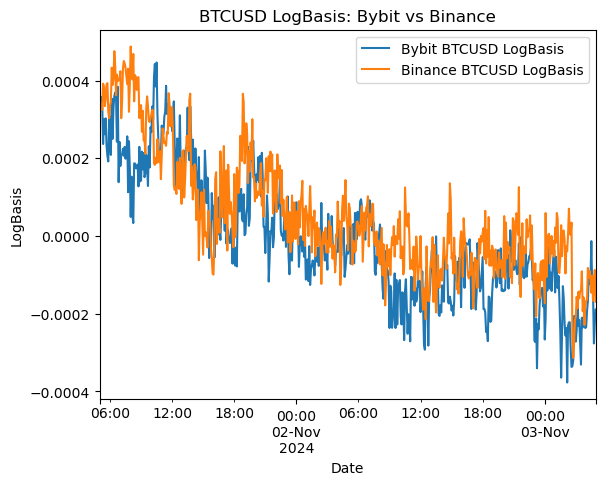

In [98]:
# BTCUSD LogBasis
btcusd_bybit_logbasis.plot(label='Bybit BTCUSD LogBasis')
btcusd_binance_logbasis.plot(label='Binance BTCUSD LogBasis')

plt.title('BTCUSD LogBasis: Bybit vs Binance')
plt.xlabel('Date')
plt.ylabel('LogBasis')
plt.legend()
plt.show()

### ETH

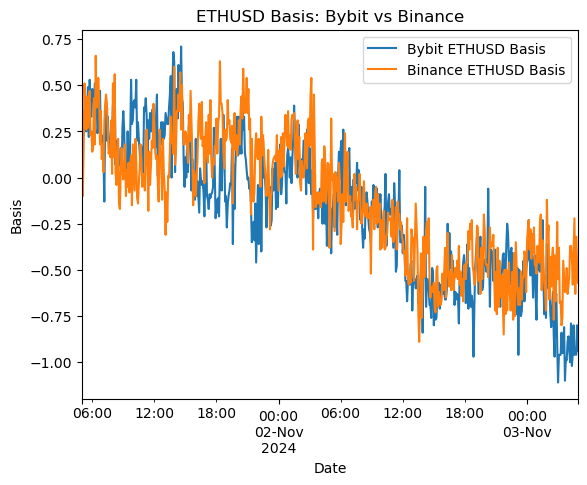

In [99]:
# ETHUSD Basis
ethusd_bybit_basis.plot(label='Bybit ETHUSD Basis')
ethusd_binance_basis.plot(label='Binance ETHUSD Basis')

plt.title('ETHUSD Basis: Bybit vs Binance')
plt.xlabel('Date')
plt.ylabel('Basis')
plt.legend()
plt.show()

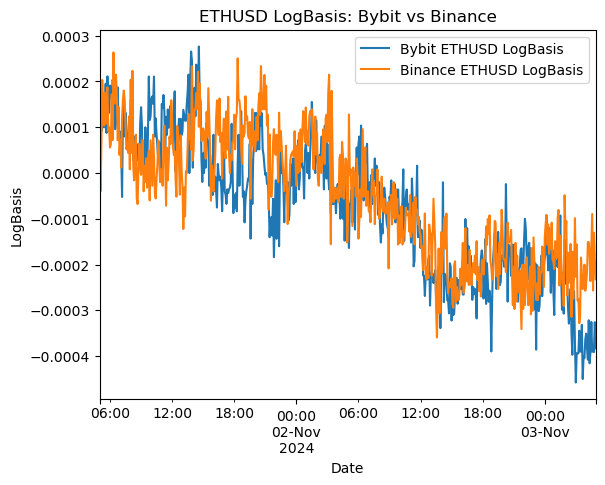

In [100]:
# ETHUSD LogBasis
ethusd_bybit_logbasis.plot(label='Bybit ETHUSD LogBasis')
ethusd_binance_logbasis.plot(label='Binance ETHUSD LogBasis')

plt.title('ETHUSD LogBasis: Bybit vs Binance')
plt.xlabel('Date')
plt.ylabel('LogBasis')
plt.legend()
plt.show()